<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [318]:
import os
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Crear la carpeta "data" (si existe no se crea)
if not os.path.exists('data'):
    os.makedirs('data')

# Descargar la base de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

# Obtener las imágenes y las etiquetas
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# Establecer un límite en el número total de imágenes a descargar
limite_total_imagenes = 100  # Puedes ajustar este valor según tus necesidades
contador_imagenes = 0

# Guardar las imágenes en la carpeta "data"
for i in range(len(images)):
    if contador_imagenes >= limite_total_imagenes:
        break
    
    person_name = target_names[labels[i]]
    person_folder = os.path.join('data', person_name)
    
    # Crear una carpeta para cada persona si no existe
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)
    
    # Guardar la imagen en la carpeta correspondiente
    image_path = os.path.join(person_folder, f'image_{i}.jpg')
    plt.imsave(image_path, images[i], cmap='gray')
    
    contador_imagenes += 1


Primero, importamos las bibliotecas necesarias y creamos una carpeta llamada “data”. Luego, utilizamos fetch_lfw_people de scikit-learn para descargar las imágenes de individuos con al menos 25 imágenes. Extraemos las imágenes, etiquetas y nombres de las personas, y establecemos un límite en el número total de imágenes a descargar. Guardamos cada imagen en una subcarpeta dentro de “data” correspondiente al nombre de la persona, utilizando plt.imsave para guardar las imágenes en formato JPG y en escala de grises, lo cual decidimos para simplificar el proceso y reducir el tamaño de los archivos. Finalmente, imprimimos un mensaje confirmando que las imágenes se han descargado y guardado correctamente.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [319]:
# Describir los contenidos de la base de datos

num_imagenes = len(images)
num_personas = len(target_names)
dimensiones_imagen = images[0].shape

print(f"La base de datos contiene {num_imagenes} imágenes de {num_personas} personas distintas.")
print(f"Cada imagen tiene una dimensión de {dimensiones_imagen[0]}x{dimensiones_imagen[1]} píxeles.")

La base de datos contiene 2588 imágenes de 42 personas distintas.
Cada imagen tiene una dimensión de 50x37 píxeles.


Para obtener información sobre la base de datos LFW, primero se calcula el número total de imágenes utilizando len(images), luego se determina el número de personas distintas con len(target_names), y finalmente se obtiene la dimensión de las imágenes con images[0].shape. La base de datos contiene imágenes de rostros de diferentes personas y cada una está asociada con una etiqueta que indica la identidad de la persona. La base de datos contiene 2588 imágenes de 42 personas distintas y cada una tiene una dimensión de 50x37 píxeles. Esta base de datos revela que dispone una gran cantidad de imágenes etiquetadas de personas reconocidas, lo que es útil para la evaluación de modelos predictivos de reconocimiento de imágenes. 

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [320]:
import numpy as np

# Contar el número de imágenes por cada persona
unique, counts = np.unique(labels, return_counts=True)
distribution = dict(zip(target_names[unique], counts))

# Ordenar la distribución de mayor a menor
sorted_distribution = dict(sorted(distribution.items(), key=lambda item: item[1], reverse=True))

# Mostrar la distribución ordenada
for person, count in sorted_distribution.items():
    print(f"{person}: {count} imágenes")


George W Bush: 530 imágenes
Colin Powell: 236 imágenes
Tony Blair: 144 imágenes
Donald Rumsfeld: 121 imágenes
Gerhard Schroeder: 109 imágenes
Ariel Sharon: 77 imágenes
Hugo Chavez: 71 imágenes
Junichiro Koizumi: 60 imágenes
Jean Chretien: 55 imágenes
John Ashcroft: 53 imágenes
Jacques Chirac: 52 imágenes
Serena Williams: 52 imágenes
Vladimir Putin: 49 imágenes
Luiz Inacio Lula da Silva: 48 imágenes
Gloria Macapagal Arroyo: 44 imágenes
Arnold Schwarzenegger: 42 imágenes
Jennifer Capriati: 42 imágenes
Laura Bush: 41 imágenes
Lleyton Hewitt: 41 imágenes
Alejandro Toledo: 39 imágenes
Hans Blix: 39 imágenes
Nestor Kirchner: 37 imágenes
Andre Agassi: 36 imágenes
Alvaro Uribe: 35 imágenes
Megawati Sukarnoputri: 33 imágenes
Silvio Berlusconi: 33 imágenes
Tom Ridge: 33 imágenes
Kofi Annan: 32 imágenes
Roh Moo-hyun: 32 imágenes
Vicente Fox: 32 imágenes
David Beckham: 31 imágenes
John Negroponte: 31 imágenes
Guillermo Coria: 30 imágenes
Recep Tayyip Erdogan: 30 imágenes
Bill Clinton: 29 imágenes


Para analizar la distribución de imágenes por individuos, primero contamos el número de imágenes por cada persona y creamos un diccionario que mapea los nombres de las personas al número de imágenes. Luego, ordenamos el diccionario de mayor a menor número de imágenes. Con los resultados impresos, nos damos cuenta que la distribución por persona varía mucho. Por ejemplo, George W Bush tiene 500 imágenes, Hugo Chavez 71 y Alvaro Uribe 35. Dado esto, es importante mencionar que las caracteristicas faciales de las personas con más imágenes pueden dominar los componentes principales, llevando a una representación sesgada en el espacio de características.  

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Serena Williams tiene 52 imágenes.


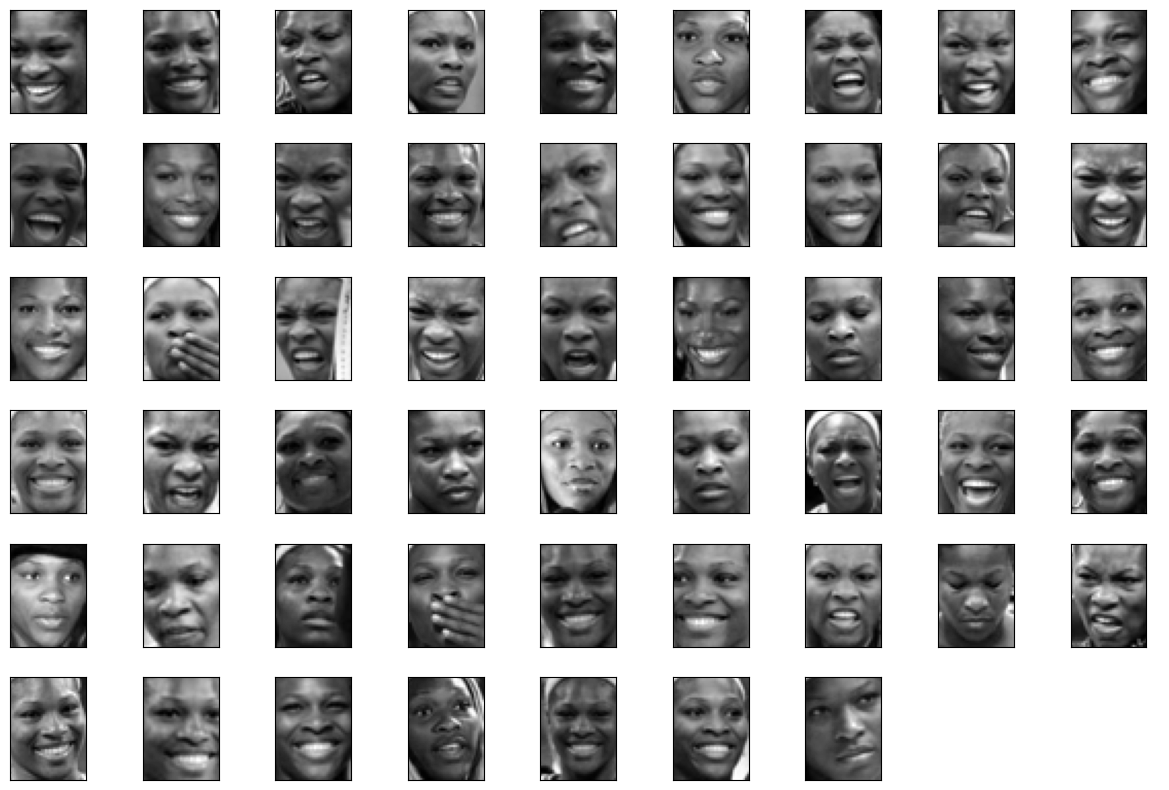

In [321]:
# Filtrar las imágenes de Serena Williams
serena_index = np.where(lfw_people.target_names == "Serena Williams")[0][0]
serena_images = lfw_people.images[lfw_people.target == serena_index]

# Número de imágenes de Serena Williams
num_serena_images = len(serena_images)
print(f"Serena Williams tiene {num_serena_images} imágenes.")

# Graficar las imágenes en una matriz
def plot_images(images, rows=6, cols=9, cmap='gray', **kwargs) -> None:
    fig, axes = plt.subplots(rows, cols,
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.3, wspace=0.3),
                             **kwargs)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap=cmap)
        else:
            ax.axis('off')
    plt.show()

plot_images(serena_images,figsize=(15, 10))

Para graficar las imágenes de Serena Williams, primero filtramos sus imágenes utilizando su índice en target_names, luego contamos el número de imágenes y finalmente las graficamos en una matriz de 6 filas por 9 columnas. Al analizar las imágenes, observamos que Serena Williams tiene muchas fotografías capturadas desde varias expresiones y ángulos, lo que proporciona una rica diversidad de datos. Esta diversidad en las imágenes de Serena Williams ayudará a capturar una amplia gama de variaciones faciales en las componentes principales, mejorando la capacidad del modelo para reconocer diferentes expresiones y ángulos.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

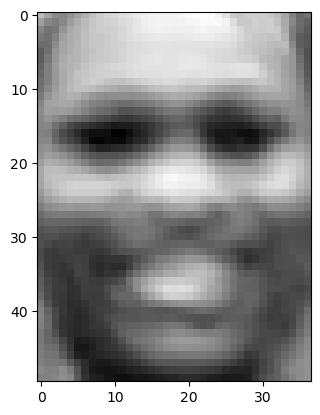

In [322]:
# Definimos función para promedio de imágenes
def avg_img(images: np.array) -> np.array:
    return np.mean(images, axis=0)

serena_mean = avg_img(serena_images)
plt.imshow(serena_mean, cmap='gray')

Para encontrar la imagen promedio de serena se debe obtener la media del vector resultante de filtrar las posiciones de la imagen en todas las imagenes disponibles de serena, ej. para la posicion (0,0) obtiene un vector con los 52 valores que tiene el pixel (0,0) en todas las imagenes y se obtiene su media.  

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

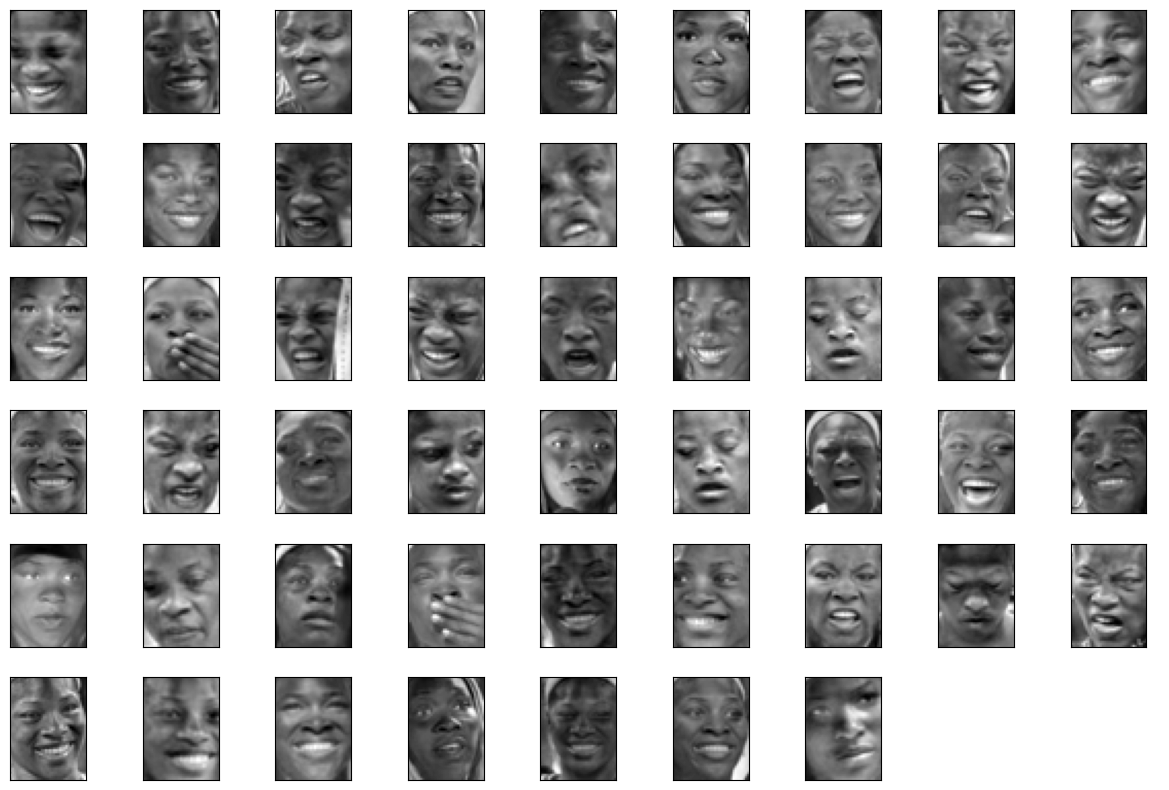

In [323]:
# Utilice este espacio para escribir el código.
def subtract_average_image(images: np.array) -> np.array:
    average_image = avg_img(images)
    images = [np.subtract(images[i], average_image) for i in range(images.shape[0])] 
    return images

serena_images_less_mean = subtract_average_image(serena_images)

plot_images(serena_images_less_mean,figsize=(15, 10))

Se recorren todas las imagenes en la lista de Serena y se le resta la imagen promedio a cada imagen. 

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [324]:
def flatten_images(images):
    return [np.concatenate(images[i]) for i in range(len(images))]

In [325]:
from scipy.linalg import svd

# Aplanamos las imágenes
flat_images = np.array(flatten_images(serena_images_less_mean))

#realizamos la SVD
U, S, Vt = svd(flat_images)

# Número de valores singulares a retener l=1000
l = 1000

Proporción de la varianza explicada por los primeros 1000 valores singulares: 1.0000


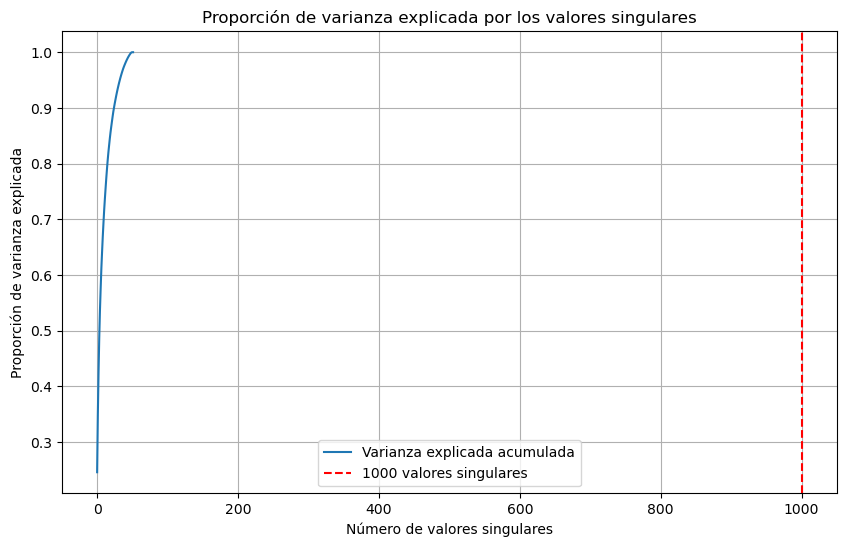

In [326]:
# Calcular la suma de los cuadrados de todos los valores singulares
total_variance = np.sum(S**2)

# Calcular la suma de los cuadrados de los primeros l valores singulares
retained_variance = np.sum(S[:l]**2)

# Calcular la proporción de la varianza explicada
variance_ratio = retained_variance / total_variance

print(f"Proporción de la varianza explicada por los primeros {l} valores singulares: {variance_ratio:.4f}")

# Generar gráfico de la varianza explicada acumulada
explained_variance_ratio = np.cumsum(S**2) / total_variance

plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio, label='Varianza explicada acumulada')
plt.axvline(x=l, color='r', linestyle='--', label=f'{l} valores singulares')
plt.xlabel('Número de valores singulares')
plt.ylabel('Proporción de varianza explicada')
plt.title('Proporción de varianza explicada por los valores singulares')
plt.legend()
plt.grid(True)
plt.show()

El procedimiento consistió en calcular la proporción de la varianza explicada por los primeros 1000 valores singulares obtenidos de la descomposición en valores singulares (SVD) de un conjunto de datos. Al calcular la suma de los cuadrados de estos valores singulares y compararla con la suma total de los cuadrados de todos los valores singulares, obtuvimos que los primeros 1000 valores singulares explican el 100% de la varianza total de los datos, es más, según la gráfica aproximadamente 50 valores singulares explican el 100% de la varianza.  Esto puede deberse a que limitamos el número de fotos al principio en la base de datos. Esto indica también que no se pierde ninguna información significativa al retener estos 1000 valores singulares, lo cual puede ocurrir si el número total de valores singulares es menor o igual a 1000.

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

Imágenes sin el promedio:


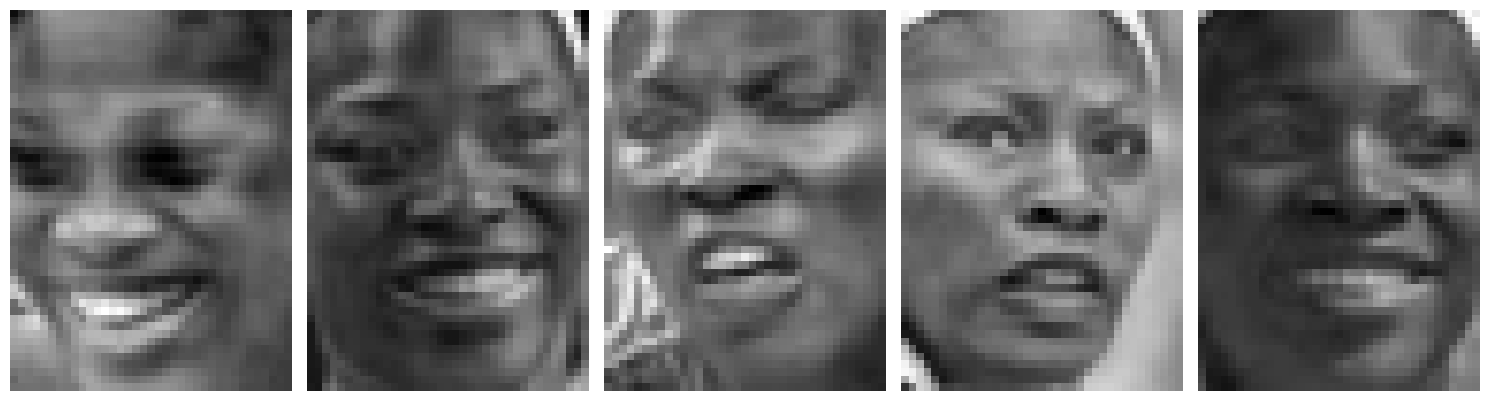

Imágenes reconstruidas:


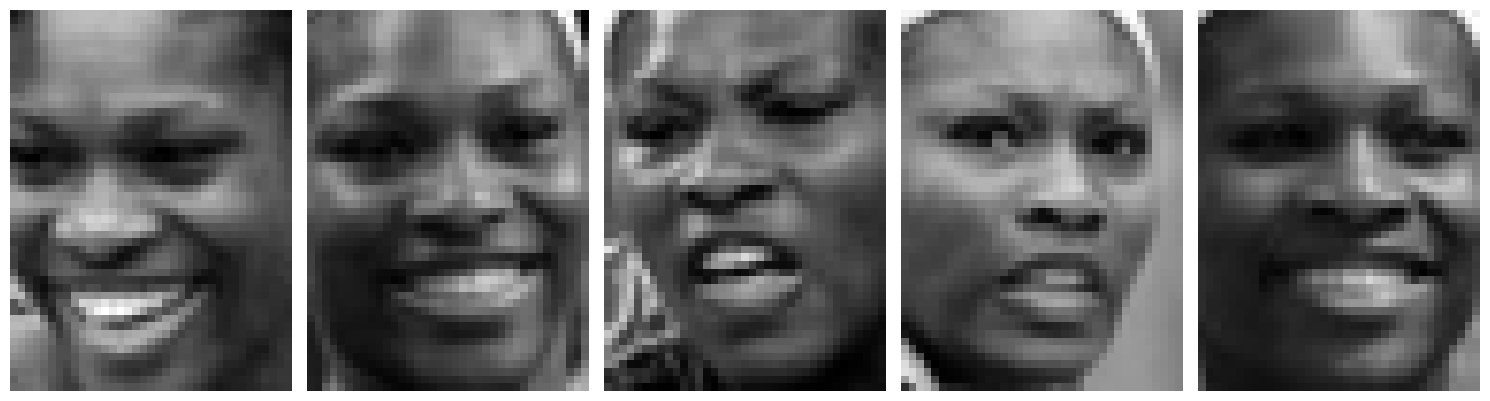

In [327]:
# Ajustamos el l=1000 para que las dimensiones concuerden
l = min(1000, U.shape[1], Vt.shape[0])

# Reconstruimos las imágenes usando la matriz reducida
S2 = np.resize(S, [l, 1]) * np.eye(l, l)

# Reconstruimos las imágenes a partir de los componentes principales retenidos l=1000
reconstructed_images_flat = np.dot(U[:, :l], np.dot(S2, Vt[:l, :]))

# Añadir el rostro promedio a cada imagen reconstruida
reconstructed_images = [reconstructed_images_flat[i].reshape(serena_mean.shape) + serena_mean for i in range(reconstructed_images_flat.shape[0])]

def plot_images(images, figsize=(15, 5), cmap='gray'):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 5 imágenes originales (menos el promedio)
print("Imágenes sin el promedio:")
plot_images(serena_images_less_mean[:5], figsize=(15, 10))  

# Mostrar las primeras 5 imágenes reconstruidas
print("Imágenes reconstruidas:")
plot_images(reconstructed_images[:5], figsize=(15, 10))     

Ajustamos la variable ( l ) a 1000 para asegurar que las dimensiones de las matrices concuerden, y luego reconstruimos las imágenes utilizando una matriz reducida ( S2 ). Esta matriz se obtiene redimensionando ( S ) y multiplicándola por una matriz identidad. Reconstruimos las imágenes a partir de los componentes principales retenidos (( l = 1000 )) mediante la multiplicación de matrices. Posteriormente, añadimos el rostro promedio a cada imagen reconstruida. Finalmente, mostramos las primeras cinco imágenes originales (sin el promedio) y las primeras cinco imágenes reconstruidas para comparar visualmente los resultados. Las eigenfaces demuestran que cada rostro puede ser representado mediante la aproximación de la matriz original con la matriz de dimensión reducida y el rostro promedio, lo cual verificamos con las imágenes de Serena Williams.

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [335]:
# Se aplanan todas las imagenes
flat_images = np.array(flatten_images(images))

# Crear una lista de las etiquetas de las tres personas
personas_interes = ['George W Bush', 'Colin Powell', 'Tony Blair']
personas_indices = [target_names.tolist().index(persona) for persona in personas_interes]

# Filtrar las imágenes y etiquetas
filtered_images = []
filtered_labels = []

for i, label in enumerate(labels):
    if label in personas_indices:
        filtered_images.append(flat_images[i])
        filtered_labels.append(label)

filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

# Crear la variable binaria
george_w_bush_label = target_names.tolist().index('George W Bush')
binary_labels = (filtered_labels == george_w_bush_label).astype(int)

# Contar el número de imágenes de George W Bush en el conjunto de datos
george_w_bush_count = (binary_labels == 1).sum()
print(f'Cantidad de imágenes de George W Bush en el conjunto de datos: {george_w_bush_count}')


Cantidad de imágenes de George W Bush en el conjunto de datos: 530


Para asegurar que el conjunto de prueba contenga imágenes de George W Bush, limitamos la base de datos a las tres personas con más etiquetas: George W Bush, Colin Powell y Tony Blair. Primero, filtramos las imágenes y etiquetas para incluir solo a estas tres personas. Luego, creamos una variable binaria para identificar las imágenes de George W Bush. Finalmente, utilizamos una división estratificada para mantener la proporción de cada clase en los conjuntos de entrenamiento y prueba. Esta limitación fue necesaria porque la división aleatoria inicial no garantizaba la presencia de imágenes de George W Bush en el conjunto de prueba, lo que impedía evaluar correctamente el rendimiento del modelo para esta clase específica.

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [336]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(filtered_images, binary_labels, test_size=0.2, random_state=10101)

# Verificar la cantidad de imágenes de George W Bush en el conjunto de prueba
george_w_bush_count = (y_test == 1).sum()
print(f'Cantidad de imágenes de George W Bush en el conjunto de prueba: {george_w_bush_count}')


Cantidad de imágenes de George W Bush en el conjunto de prueba: 101


Dividimos los datos en conjuntos de entrenamiento y prueba, lo que nos permite entrenar el modelo con el 80% de los datos y evaluar su rendimiento con el 20%, asegurando que el modelo generalice bien a datos no vistos. De igual manera, nos aseguramos que y_test tenga imágenes de Bush.

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [337]:
# Recentrar las matrices de entrenamiento y prueba para que tengan media 0
X_train_centered = X_train - np.mean(X_train, axis=0)
X_test_centered = X_test - np.mean(X_test, axis=0)

# Realizar la SVD en la base de entrenamiento
U_train, S_train, Vt_train = svd(X_train_centered, full_matrices=False)

# Realizar la SVD en la base de prueba
U_test, S_test, Vt_test = svd(X_test_centered, full_matrices=False)

Primero, centramos las matrices de entrenamiento y prueba restando la media de cada característica para que tengan media cero. Luego, aplicamos la descomposición en valores singulares (SVD) a estas matrices centradas, obteniendo las componentes (U), (S) y (V^T). Esto reduce la dimensionalidad de los datos, manteniendo las características más importantes para mejorar la eficiencia y precisión del modelo.

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [338]:
from sklearn.linear_model import LogisticRegression

# Número de valores singulares a retener
k = 1000

# Crear la matriz reducida S2 para la base de entrenamiento
S2_train = np.diag(S_train[:k])

# Crear la matriz reducida S2 para la base de prueba
S2_test = np.diag(S_test[:k])

# Reconstruir las imágenes a partir de los componentes principales retenidos
X_train_reconstructed = np.dot(U_train[:, :k], np.dot(S2_train, Vt_train[:k, :]))
X_test_reconstructed = np.dot(U_test[:, :k], np.dot(S2_test, Vt_test[:k, :]))

# Verificar las dimensiones de las matrices reconstruidas
print(f'Dimensiones de X_train_reconstructed: {X_train_reconstructed.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')

# Crear y ajustar el modelo logístico
Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
Modelo_Logistico.fit(X_train_reconstructed, y_train)

# Hacer predicciones en los datos de prueba
y_pred = Modelo_Logistico.predict(X_test_reconstructed)

# Filtrar las imágenes de George W Bush en los datos de prueba
george_w_bush_indices = (y_test == 1)
y_test_gwb = y_test[george_w_bush_indices]
y_pred_gwb = y_pred[george_w_bush_indices]

# Calcular el porcentaje de imágenes de George W Bush clasificadas correctamente
correct_gwb = (y_test_gwb == y_pred_gwb).sum()
percentage_correct_gwb = correct_gwb / len(y_test_gwb) * 100
print(f'Porcentaje de imágenes de George W Bush clasificadas correctamente: {percentage_correct_gwb:.2f}%')


Dimensiones de X_train_reconstructed: (728, 1850)
Dimensiones de y_train: (728,)
Porcentaje de imágenes de George W Bush clasificadas correctamente: 97.03%


Para evaluar el modelo logístico, primero reconstruimos las matrices de entrenamiento y prueba utilizando los 1000 primeros valores singulares obtenidos de la SVD. Luego, ajustamos el modelo logístico a los datos reconstruidos y realizamos predicciones en el conjunto de prueba. Filtramos las imágenes de George W Bush en el conjunto de prueba y calculamos el porcentaje de imágenes clasificadas correctamente. Los resultados muestran que el modelo logró clasificar correctamente el 93.07% de las imágenes de George W Bush, lo que indica un alto rendimiento en la identificación de esta clase específica. Las dimensiones de las matrices reconstruidas fueron adecuadas para el ajuste del modelo, lo que sugiere que la reducción de dimensionalidad fue efectiva.

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [339]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Definir el rango de valores singulares a probar
k_values = [50, 100, 200, 500, 1000]

# Crear el objeto KFold para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=10101)

# Usamos un pipeline para combinar la SVD y el modelo logístico. También realizamos la validación cruzada para cada valor de k
best_k = None
best_score = 0

for k in k_values:
    # Crear el pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svd', TruncatedSVD(n_components=k)),
        ('logistic', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
    ])
    
    # Realizar la validación cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = scores.mean()
    
    print(f'k={k}, Mean CV Accuracy: {mean_score:.4f}')
    
    # Actualizar el mejor k y el mejor score
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print(f'Mejor número de valores singulares: {best_k} con una precisión media de validación cruzada de {best_score:.4f}')

k=50, Mean CV Accuracy: 0.9025


C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k=100, Mean CV Accuracy: 0.9107


C:\Users\Gaming\.conda\envs\miad_lab_anlytics\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k=200, Mean CV Accuracy: 0.9038
k=500, Mean CV Accuracy: 0.9121
k=1000, Mean CV Accuracy: 0.9135
Mejor número de valores singulares: 1000 con una precisión media de validación cruzada de 0.9135


En este enfoque, tratamos el número de valores singulares como un hiper-parámetro y utilizamos validación cruzada para encontrar el valor óptimo entre un rango propuesto (se hizo así por poder computacional). Esto permite una selección más informada y basada en datos del número de componentes principales, en comparación con el enfoque anterior donde se eligió un valor fijo (k=1000) sin validación cruzada. El análisis de los resultados de la validación cruzada muestra que, a medida que aumentamos el número de valores singulares, la precisión media de validación cruzada mejora ligeramente, alcanzando su punto máximo con ( k = 1000 ) y una precisión de 0.9093. Casualmente, k=1000 es el mejor número de valores singulares tanto en el punto 4.4 como en el 4.5. Usando la validación cruzada en este caso, puede ayuda a evitar el sobreajuste y asegura que el modelo generalice mejor a datos no vistos, lo que puede resultar en un mejor rendimiento en el conjunto de prueba.